# EDA

In [1]:
# Importing Libraries

# Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Acuraccy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Dataset\kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# In this col ID is not necessary we drop this columns
# if we see in the Date col the date is not in proper format 

In [4]:
df.to_csv('House_Data.csv')

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [145]:
# lat', 'long', 'sqft_living15', 'sqft_lot15'
# this col are not much more important we drop this


In [9]:
df.drop(df[['lat', 'long', 'sqft_living15', 'sqft_lot15','id']],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


In [11]:
df['date'] = df['date'].str.replace('T000000','')

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


In [14]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074


Text(0, 0.5, 'Bedrooms')

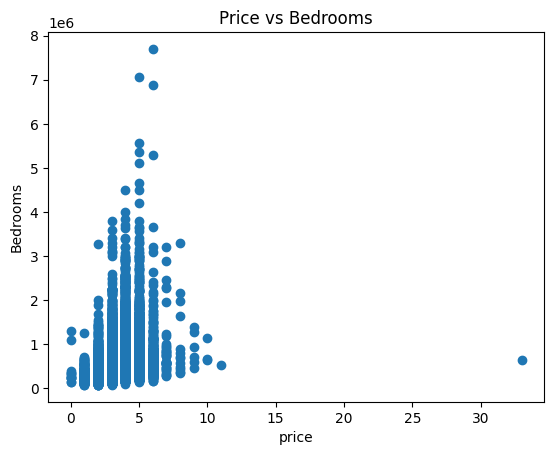

In [16]:
plt.scatter(x=df['bedrooms'],y=df['price'])
plt.title('Price vs Bedrooms')
plt.xlabel('price')
plt.ylabel('Bedrooms')

In [17]:
# In this Graph we can see here Most of the bedroom are in the price between 1 to 14
# The 1 bedroom is most expensive theire price goes to 30
# There are sum houses have the 7 and 8 bedrooms

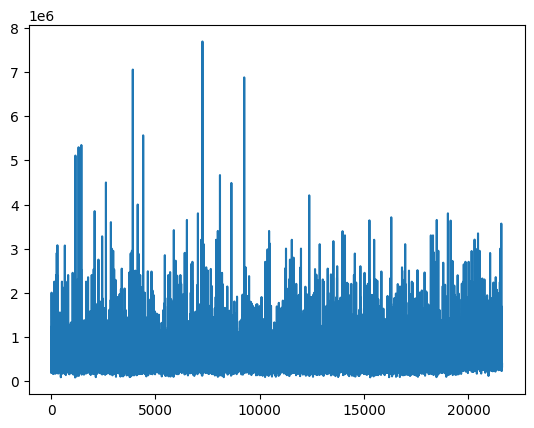

In [18]:
plt.plot(df['price'])

In [19]:
# Here we can see the house have cross the price 5000 , 80000, 3000

In [20]:
# Check the stat summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000


In [21]:
# In this summary we see here in some houses there will be no bedroom and bathroom
# The maximum price of the house is 7.700000e+06

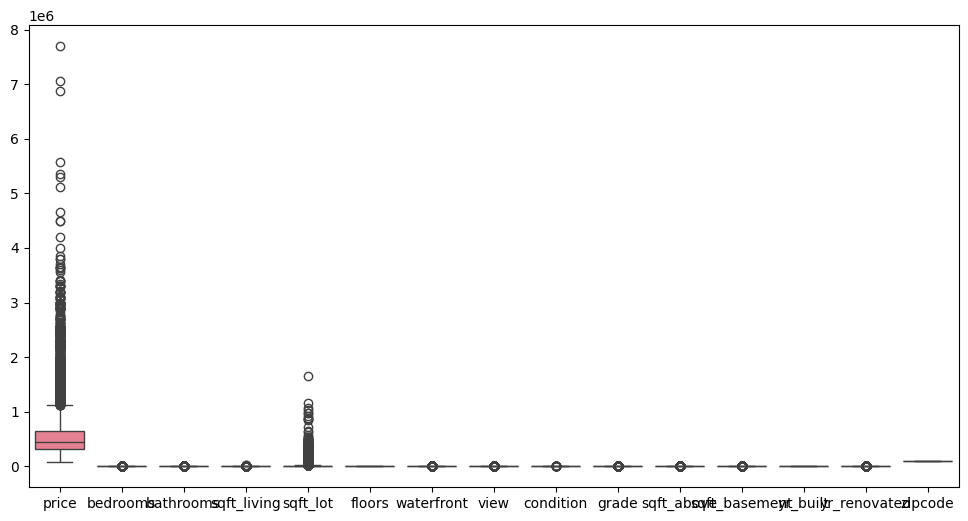

In [22]:
# Check the Outlier or not
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [23]:
# In this price col there are lot of outlier are present
# but we don't need to remove bcoz this is our output variable

In [24]:
# Fix bedrrom and bathroom
df['bedrooms'] = df['bedrooms'].replace(0,df['bedrooms'].mean())
df['bathrooms'] = df['bathrooms'].replace(0,df['bathrooms'].mean())

In [25]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372869,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000


In [26]:
# EDA and Visualization is done

## Feature engineering

In [27]:
df['date'] = pd.to_numeric(df['date'],errors='coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.6 MB


In [29]:
X = df.drop('price',axis=1)
y = df['price']

In [30]:
# Get the Numerical Columns
num_cols = X.select_dtypes(include=[np.number]).columns

In [31]:
X.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [32]:
num_cols

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [33]:
num_trans = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [34]:
num_trans

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [35]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_trans,num_cols)
])
preprocessor

,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [36]:
# Dependant and In-dependant variable


In [37]:
X.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [38]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
X_train.shape,X_test.shape

((17290, 15), (4323, 15))

In [41]:
X_train = preprocessor.fit_transform(X_train)

In [42]:
X_train

array([[-0.75912806, -0.39814498, -0.47630165, ...,  0.40400107,
        -0.20829394, -0.6746308 ],
       [ 1.44802282, -1.47511032, -1.4559423 , ..., -1.43056508,
        -0.20829394,  0.75060414],
       [ 1.42907151, -0.39814498, -1.4559423 , ..., -0.98891026,
        -0.20829394,  1.2756907 ],
       ...,
       [-0.66820689, -0.39814498,  0.503339  , ...,  1.11744347,
        -0.20829394, -0.4683468 ],
       [-0.73814625, -2.55207566, -1.78248918, ..., -0.27546787,
        -0.20829394,  1.68825871],
       [ 1.45140698,  0.67882037,  0.503339  , ...,  1.18539036,
        -0.20829394, -0.6746308 ]], shape=(17290, 15))

In [43]:
X_test = preprocessor.transform(X_test)

In [44]:
X_test

array([[-0.65106046,  0.67882037,  0.17679212, ...,  0.50592142,
        -0.20829394, -0.37458134],
       [-0.69279847,  1.75578571,  1.15643277, ...,  0.20016039,
        -0.20829394,  0.69434487],
       [-0.69415213,  0.67882037,  0.503339  , ...,  0.87962934,
        -0.20829394, -1.34974209],
       ...,
       [-0.64880435,  0.67882037,  0.503339  , ...,  1.21936381,
        -0.20829394, -1.44350754],
       [-0.60706635,  0.67882037, -0.47630165, ..., -0.13957408,
        -0.20829394, -1.31223591],
       [-0.60458463,  0.67882037,  0.503339  , ...,  1.25333726,
        -0.20829394, -1.40600136]], shape=(4323, 15))

In [45]:
df.to_csv('House_Data.csv')

## Model Building

In [181]:
models = {
    'Linear Regression ' : LinearRegression(),
    'Random Forest ' : RandomForestRegressor(),
    'KNeighbors ' : KNeighborsRegressor(),
    'Adaboost ' : AdaBoostRegressor()
} 

In [186]:
def evaluate(X_train, y_train, X_test, y_test, models):
    report = {}
    for i in range(len(models)):
        model_name = list(models.keys())[i]
        model = models[model_name]
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = r2_score(y_test, y_pred)  # Note: y_test should be first

        report[model_name] = acc*100  # Corrected assignment
    return report


In [187]:
evaluate(X_train,y_train,X_test,y_test,models)

{'Linear Regression ': 65.30327945015443,
 'Random Forest ': 77.51339720589837,
 'KNeighbors ': 68.20242042097998,
 'Adaboost ': 22.854920610545015}

In [195]:
# The best score is random forest is 77%

In [196]:
# We move forward with random forest

In [222]:
clf = RandomForestRegressor(max_depth=50,n_estimators=100)

In [223]:
clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [224]:
y_pred = clf.predict(X_test)

In [225]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [226]:
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'Score is : {r2}')

mae : 92530.90070090216
mse : 32941804229.809383
rmse : 181498.7719787916
Score is : 0.7820973631584232


In [228]:
# The final Accuracy of the model is 78% that is Good fit for the detecting price of the model